In [1]:
import pandas as pd
import time
import numpy as np

In [2]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

In [3]:
def headless_Firefox():
    options = Options()
    options.headless = True
    driver = webdriver.Firefox(options = options)
    return driver
def LinkedIn_login(driver):
    driver.get("https://www.linkedin.com/login?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin")
    time.sleep(3)
    email = driver.find_element_by_id('username')
    email.click()
    email.send_keys('nachoeddie@gmail.com')
    password = driver.find_element_by_id('password')
    password.click()
    password.send_keys('GotHeOnfOrsi')
    driver.find_element_by_xpath("//button[@type = 'submit']").click()

In [4]:
def LinkedIn_search(driver, keys):
    search_bar = driver.find_element_by_class_name('search-global-typeahead__input')
    search_bar.click()
    search_bar.send_keys(f'{keys}')
    search_bar.send_keys(u'\ue007')
    time.sleep(7)
    driver.find_element_by_xpath("//button[@aria-label='View only Content results']").click()

In [5]:
from numpy.random import randint
def scroll_scrape(num_posts, scroll_time = 1):
    if num_posts % 6 != 0:
        raise ValueError('Number of posts wanted to scrape is not divisible by 6.')
    last_height = driver.execute_script("return document.body.scrollHeight")
    num_scrapped = 0
    scroll_num = 0 
    non_loads = 0
    dist = 50
    while num_scrapped < num_posts:
#         scroll_time = randint(2, 6)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(scroll_time)
        new_height=driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            driver.execute_script(f"window.scrollTo(0, document.body.scrollHeight - {dist})")
            dist += 50
            non_loads += 1
            if non_loads > 15:
                posts = driver.find_elements_by_xpath("//li[@class='search-content__result search-entity ember-view']")
                break
        else:
            last_height = new_height
            non_loads = 0
            scroll_num += 1
            dist = 50
            if scroll_num >= num_posts / 6:
                posts = driver.find_elements_by_xpath("//li[@class='search-content__result search-entity ember-view']")
                num_scrapped = len(posts)
    return posts


In [6]:
import re
def only_numeric(str):
    return float(re.sub("[^0-9]", "", str))


In [7]:
def see_more(post):
    try:
        see_more = post.find_element_by_xpath(".//button[@class='feed-shared-inline-show-more-text__see-more-less-toggle see-more t-14 t-black--light t-normal hoverable-link-text']")
    except:
        pass
    else:
        see_more.click()

In [8]:
def name_scrape(post):
    try:
        name = post.find_element_by_xpath(".//span[@class='feed-shared-actor__name t-14 t-black t-bold hoverable-link-text']")
    except:
        pass
    else:
        return name.text.replace('\n', '')

In [9]:
def subdes_scrape(post):
    try:
        subdes = post.find_element_by_xpath(".//div[@class='truncate feed-shared-text-view white-space-pre-wrap break-words ember-view']")
    except:
        pass
    else:
        return subdes.text.replace('\n', '')

In [10]:
def time_scrape(post):
    try:
        scrapped = post.find_elements_by_xpath(".//div[@class = 'feed-shared-text-view white-space-pre-wrap break-words ember-view']")
        time = scrapped[-1].text
    except:
        pass
    else:
        for idx, char in enumerate(time):
            if char.isalnum() == False:
                return time[:idx]

In [11]:
def corpus_scrape(post):
    try:
        corpus = post.find_element_by_xpath(".//div[@class='feed-shared-update-v2__description-wrapper ember-view']")
    except:
        pass
    else:
        return corpus.text.replace('\n', ' ')

In [12]:
def reaction_scrape(post):
    try:
        reaction = post.find_element_by_xpath(".//span[@class='v-align-middle social-details-social-counts__reactions-count']")
    except:
        return 0.0
    else:
        return only_numeric(reaction.text)

In [13]:
def comment_scrape(post):
    try:
        comments = post.find_element_by_xpath(".//li[@class='social-details-social-counts__item social-details-social-counts__comments']")
    except:
        return 0.0
    else:
        return only_numeric(comments.text)

In [14]:
def art_scrape(post):
    try:
        art_title = post.find_element_by_xpath(".//h2[@class='feed-shared-article__title t-14 t-bold t-black']")
        art_source = post.find_element_by_xpath(".//h3[@class='feed-shared-article__subtitle t-12 t-normal t-black--light']")
    except:
        pass
    else:
        return (art_title.text.replace('\n', ''), art_source.text.replace('\n', ''))

In [15]:
def img_scrape(post):
    try:
        imgs = post.find_elements_by_xpath(".//div[@class='feed-shared-image__container']")
    except:
        pass
    else:
        return len(imgs)

In [16]:
def video_scrape(post):
    try:
        post.find_element_by_xpath(".//div[@class='feed-shared-linkedin-video__container ']")
        views = post.find_element_by_xpath(".//li[@class='social-details-social-counts__item']")
    except:
        pass
    else:
        return (1, only_numeric(views.text))

In [17]:
def array_post(post):
    see_more(post)
    a = [None] * 11
    arr = np.asarray(a)
    name = name_scrape(post)
    subdes = subdes_scrape(post)
    time = time_scrape(post)
    corp = corpus_scrape(post)
    react = reaction_scrape(post)
    com = comment_scrape(post)
    art = art_scrape(post)
    img = img_scrape(post)
    vid = video_scrape(post)
    if name != None:
        arr[0] = name
    if subdes != None:
        arr[1] = subdes
    arr[2] = time
    if corp != None:
        arr[3] = corp
    arr[4] = react
    arr[5] = com
    if art != None:
        arr[6] = art[0]
        arr[7] = art[1]
    if img != None:
        arr[8] = img
    if vid != None:
        arr[9] = vid[0]
        arr[10] = vid[1]
    return arr

In [20]:
def scrape_posts(posts):
    mat = np.array([])
    for post in posts:
        arr = array_post(post)
        mat = np.append(mat, arr)
    rmat = mat.reshape(-1,11)
    cols = np.array(['name', 'subdes', 'time_dis', 'corpus', 'reaction', 'comments', 'art_title', 'art_source', 'img', 'video', 'views'])
    df = pd.DataFrame(rmat, columns = cols)
    return df


In [21]:
import langdetect
#ISO 639-1 codes
def langfind(x):
    try:
        return str(langdetect.detect_langs(x)[0])[:2]
    except:
        return np.nan
# df['language'] = df['corpus'][df['corpus'].apply(lambda x: x != None)].apply(langfind)


In [22]:
def add_language(df, corpus_column):
    df['language'] = df[f'{corpus_column}'][df[f'{corpus_column}'].apply(lambda x: x != None)].apply(langfind)


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# analyser = SentimentIntensityAnalyzer()
# corpus_sent = df['corpus'][df['corpus'].apply(lambda x: x != None)].apply(lambda x: analyser.polarity_scores(x))
# df['neg'] = corpus_sent.apply(lambda x: x['neg'])
# df['neu'] = corpus_sent.apply(lambda x: x['neu'])
# df['pos'] = corpus_sent.apply(lambda x: x['pos'])
# df['compound'] = corpus_sent.apply(lambda x: x['compound'])


In [24]:
def add_sentiment(df, corpus_column):
    analyser = SentimentIntensityAnalyzer()
    corpus_sent = df[f'{corpus_column}'][df[f'{corpus_column}'].apply(lambda x: x != None)].apply(lambda x: analyser.polarity_scores(x))
    df['neg'] = corpus_sent.apply(lambda x: x['neg'])
    df['neu'] = corpus_sent.apply(lambda x: x['neu'])
    df['pos'] = corpus_sent.apply(lambda x: x['pos'])
    df['compound'] = corpus_sent.apply(lambda x: x['compound'])


In [25]:
#Should convert to OOP
driver = headless_Firefox()
LinkedIn_login(driver)
time.sleep(7)

LinkedIn_search(driver, 'Technology')
time.sleep(7)
posts = scroll_scrape(num_posts = 30)
df = scrape_posts(posts)
add_language(df, 'corpus')
add_sentiment(df, 'corpus')

In [27]:
indu = pd.read_csv('industries.csv')

,Unnamed: 0,Code,Groups,Description
0,0,Code,Groups,Description
1,1,47,"corp, fin",Accounting
2,2,94,"man, tech, tran",Airlines/Aviation
3,3,120,"leg, org",Alternative Dispute Resolution
4,4,125,hlth,Alternative Medicine


In [26]:
df.head()

,name,subdes,time_dis,corpus,reaction,comments,art_title,art_source,img,video,views,language,neg,neu,pos,compound
0,John Fanning,Strategic Accounts Director at Ethisphere Inst...,22m,One more example of what is so great about wor...,0,0,Dell Technologies: Partnering with Ethisphere ...,magazine.ethisphere.com,0,None,None,en,0.000,0.591,0.409,0.9733
1,Tiger Buford,Retained Recruiter in the Orthopedics Industry...,18m,Dear Engineering Leaders… it’s time to mingle ...,0,0,If you want a BIG breakthrough… mingle differe...,tigerbuford.com,0,None,None,en,0.000,0.822,0.178,0.3818
2,Kaitlin Pugliese,Scientist 2 at Illumina,17m,Very proud to work for a top 50 Healthcare Tec...,1,0,Top 50 Healthcare Technology CEOs of 2019,thehealthcaretechnologyreport.com,0,None,None,en,0.033,0.803,0.164,0.8772
3,Rick Nalle,Strategic Operations / Account Management at B...,23m,The 2019 Gartner Information Security & Risk M...,0,0,The 2019 Gartner Information Security & Risk M...,bit.ly,0,None,None,en,0.141,0.606,0.252,0.5093
4,Joel Kohn,"VP, Sales & Marketing at Fidelis Sustainabilit...",9h,Exciting technology - now with 3D visualizatio...,1,0,Synaptive Medical Announces Product Update to ...,businesswire.com,0,None,None,en,0.000,0.788,0.212,0.5411


In [ ]:
# df.to_csv("banking.csv", index=False)

In [ ]:
df['img'].value_counts()

In [ ]:
df.tail()

In [ ]:
df.language.value_counts(sort = False).plot.pie()
plot.show()

In [ ]:
n_cor = df['reaction'][df['corpus'].apply(lambda x: x == None)].mean()
cor = df['reaction'][df['corpus'].apply(lambda x: x != None)].mean()

In [ ]:
plt.bar(['No Text','Text'],[n_cor, cor])

In [ ]:
df.groupby([['corpus'].apply(lambda x: x == None)]).mean()

In [ ]:
plt.scatter(df['pos'][df['corpus'].apply(lambda x: x != None)], df['reaction'][df['corpus'].apply(lambda x: x != None)])

In [ ]:
df[['art_source', 'comments']].groupby('art_source').mean()

In [ ]:
df[df['neu'].apply(lambda x: type(x) != float)]

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [30]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['corpus'][df['language'] == 'en'])


In [31]:
X[0]

<1x678 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

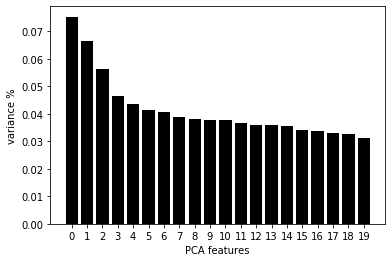

In [32]:
from sklearn.preprocessing import StandardScaler
# Standardize the data to have a mean of ~0 and a variance of 1
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X.todense())# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

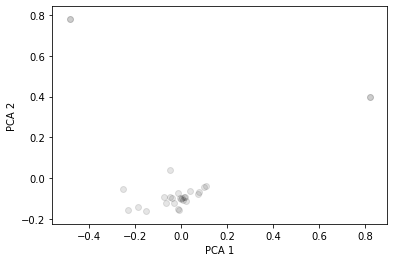

In [33]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [34]:
num_clusters = 4
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# texts_list = some array of strings for which TF-IDF is being computed

# create k-means model with custom config
clustering_model = KMeans(n_clusters=num_clusters)

labels = clustering_model.fit_predict(X)

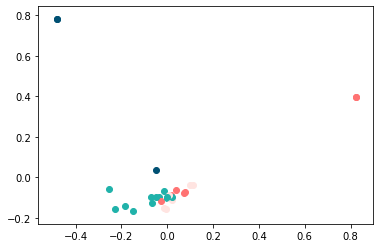

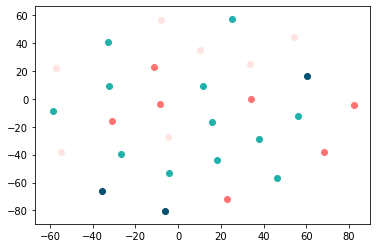

In [35]:
dense = X.todense()
reduced_data = PCA(n_components=pca_num_components).fit_transform(dense)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()



# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(dense)
fig, ax = plt.subplots()
for index, instance in enumerate(Y):
    tsne_1, tsne_2 = Y[index]
    color = labels_color_map[labels[index]]
    ax.scatter(tsne_1, tsne_2, c=color)
# plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

In [ ]:
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
print("Top terms per cluster:")
order_centroids = clustering_model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in K:
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

In [ ]:
#This is how to predict what cluster a corpus would be in.
Y = vectorizer.transform(["Nicotine is very bad for your health just like vaping."])
prediction = model.predict(Y)
print(prediction)

In [ ]:
print(model.cluster_centers_)

In [ ]:
top_centroids = model.cluster_centers_.argsort()[:,-1:-11:-1]
print("\n3) top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(terms[i] for i in centroid)))